In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.misc import derivative

In [3]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [4]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

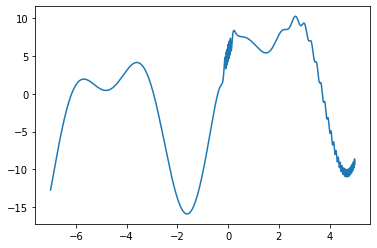

In [6]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

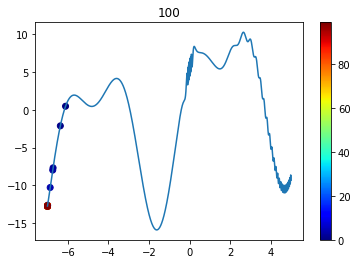

In [28]:
import matplotlib.cm as cm

x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1


plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()



## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

[-4.713771377137713, -5.085808580858085, -6.48034803480348, -6.953195319531953, -6.9615961596159615, -6.983198319831983, -6.9927992799279926, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0]


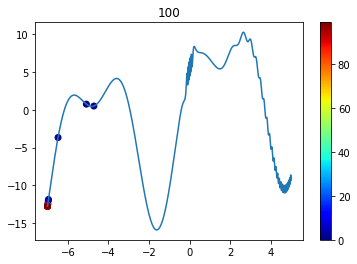

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import matplotlib.cm as cm

def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

def gradient_descent(function, X, max_it):
    
    data = X
    threshold =0.01
    points = []
    
    for i in range(0,max_it): 
        index = np.random.randint(0,len(data))
        derivative_in_point = derivative(function, data[index])
        points.append(data[index])
        if np.abs(derivative_in_point)<threshold:
            break
        elif derivative_in_point>0:
            data = data[0:index+1]
        else:
            data = data[index:]

    print(points)   
    plt.figure()
    plt.plot(X,function(X))
    plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    plt.title(str(i+1))
    plt.colorbar()

x = np.linspace(-7,5,10000)
gradient_descent(function, x, max_it=100)

In [30]:
derivative(function,-7.0)

11.868798843159507

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



In [26]:
plt.fill_between(section, function(section))

NameError: name 'section' is not defined

### Example

interval = \[2,5\]

Function f(x) = x


In [221]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [222]:
area_under_the_curve = result[0]

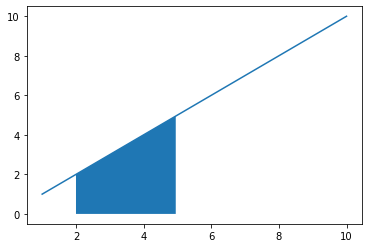

In [223]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

1 interval = [2,5]
Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

(15.0, 1.6653345369377348e-13)
15.0


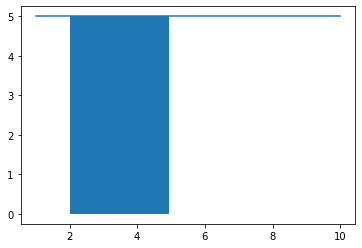

In [32]:
a, b = [2, 5]
def f(x):
    return 5*np.ones_like(x)

result = integrate.quad(f, a, b)
print(result)
area_under_the_curve = result[0]
print(area_under_the_curve)
x = np.linspace(1,10, 100)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


1 interval = [-1,1]
Function f(x) = 1/x

(0.0, 0.0)
0.0


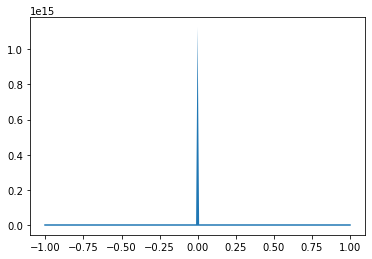

In [33]:
a, b = [-1, 1]
def f(x):
    return 1/x

result = integrate.quad(f, a, b, points=[0])
print(result)
area_under_the_curve = result[0]
print(area_under_the_curve)
x = np.linspace(-1,1, 100)
section = np.arange(a, b, 1/100)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

1 interval = [-pi,pi]
Function f(x) = sin(x)

(0.0, 4.3998892617846e-14)
0.0


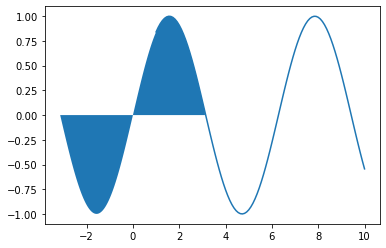

In [34]:
a, b = [-np.pi, np.pi]
def f(x):
    return np.sin(x)

result = integrate.quad(f, a, b)
print(result)
area_under_the_curve = result[0]
print(area_under_the_curve)
x = np.linspace(1,10, 100)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

interval = [-pi,pi]
Function f(x) = cos(x)

(2.615901373506474e-16, 4.471737093238828e-14)
2.615901373506474e-16


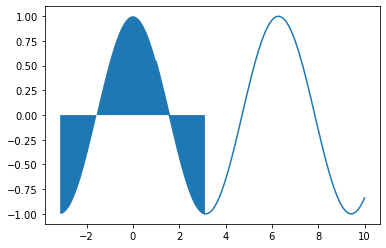

In [35]:
a, b = [-np.pi, np.pi]
def f(x):
    return np.cos(x)

result = integrate.quad(f, a, b)
print(result)
area_under_the_curve = result[0]
print(area_under_the_curve)
x = np.linspace(1,10, 100)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

interval = [-pi,pi]
Function f(x) = sin(x) - cos(2x)

(5.231802747012948e-16, 4.085699506880975e-09)
5.231802747012948e-16


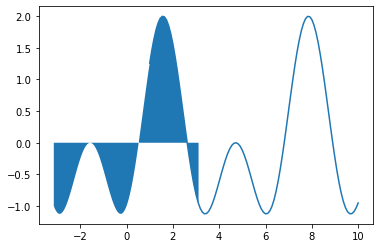

In [36]:
a, b = [-np.pi, np.pi]
def f(x):
    return np.sin(x)-np.cos(2*x)

result = integrate.quad(f, a, b)
print(result)
area_under_the_curve = result[0]
print(area_under_the_curve)
x = np.linspace(1,10, 100)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))